##Day 59 - DIY Solution

**Q1. Problem Statement: Time Series Analysis and Association Rules Mining**

Load the 'Groceries_TS_And_ARM_dataset.csv' dataset into a DataFrame and perform the following Tasks:
1.	Extract the year, month, and the day from the 'Date' column
2.	Perform EDA on the DataFrame to observe the sales on each day of the week
3.	Perform EDA on the DataFrame to observe the sales in each month of the year
4.	Perform EDA on the DataFrame to observe the sales on each day of the month
5.	Plot the number of visitors visiting the store with respect to time and observe the trend in sales over the years using the Matplotlib library
6.	Build an Apyori model to draft association rules among all the product categories with parameters - min_support=0.00030, min_confidance=0.01, and min_lift=3
7.	Sort the association pairs/rules with respect to the decreasing order of the lift
8.	From the association rules, write down the necessary strategy to pair up the products to increase the sales


**Step-1:** Importing the required libraries.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

**Step-2:** Loading the data into a DataFrame and parsing the 'Dates' column using parse_dates() function.

In [2]:
df = pd.read_csv('/content/Groceries_TS_And_ARM_dataset.csv', parse_dates=['Date'])
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


**Step-3:** Extracting year, month and the day from the 'Date' column.

In [3]:
# For extracting year,month and day to new column,follow the code:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_name()
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday


**Step-4:** Performing EDA on the DataFrame to observe the sales in each day of the week.

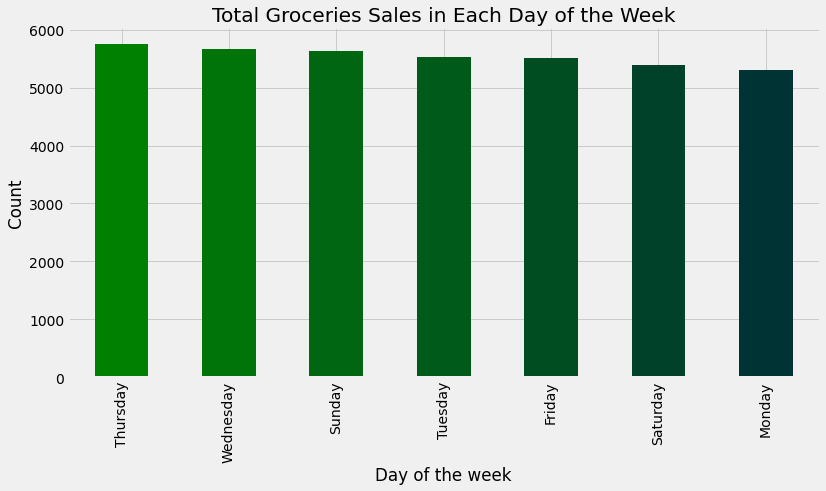

In [4]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

df['day_of_week'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Day of the Week').set(xlabel='Day of the week', ylabel='Count');

**Step-5:** Performing EDA on the DataFrame to observe the sales in each month of the year.

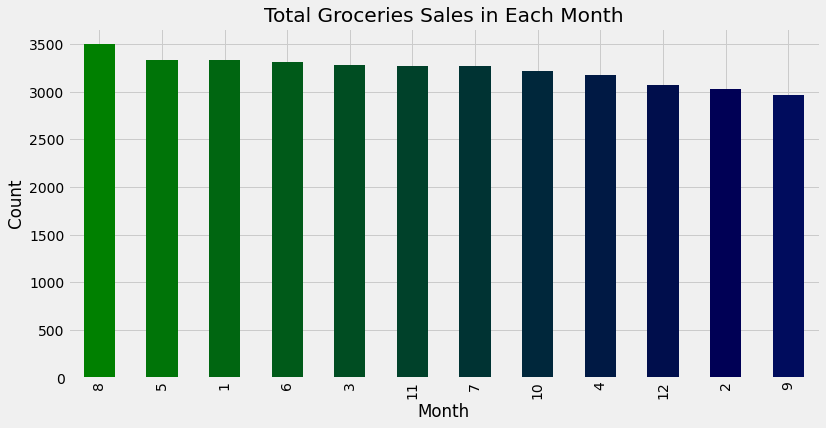

In [5]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

df['month'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Month').set(xlabel='Month', ylabel='Count');

**Step-6:** Performing EDA on the DataFrame to observe the sales in each day of the month.

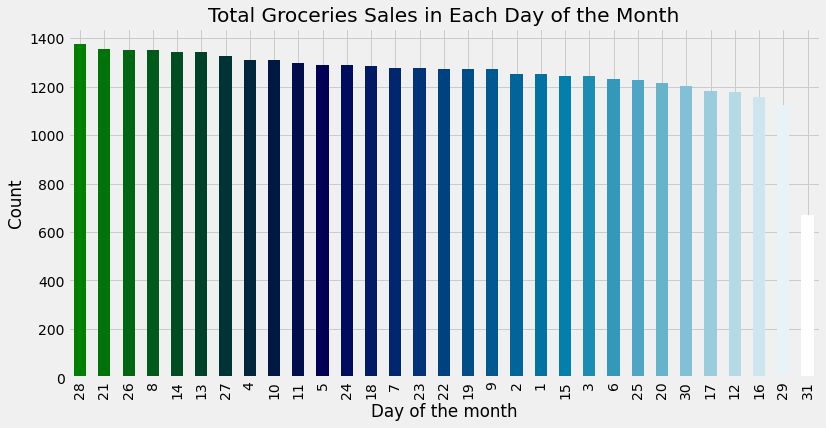

In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

df['day'].value_counts().plot(kind='bar', color=color, title='Total Groceries Sales in Each Day of the Month').set(xlabel='Day of the month', ylabel='Count');

TSA

**Step-7:** Aggregating the data with date to see more clearly which items are bought on which date and creating a new dataframe and store unique visitors and unique bought items.

In [7]:
# Aggregating the data with date to see more clearly which items are bought on which date
# Creating a new dataframe and store unique visitors and unique bought items
groceries_time = pd.DataFrame(df.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = df.groupby('Date')['Member_number'].nunique().values
groceries_time['items_count'] = df.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = df.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."


**Step-8:** Plotting the number of visitors visiting the store with respect to time.

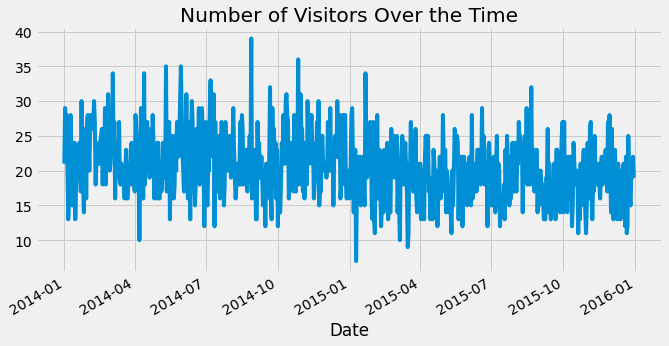

In [8]:
groceries_time['members_count'].plot(figsize=(10, 5),title='Number of Visitors Over the Time');

We can see that the visitors in the store have gradually declined over the time from year 2014 to 2016 so there is a need of improving the sales strategy for which we will use **Association Rules Mining** to pair up the store commodities in prder to increase the number of visitors.

**Step-9:** Downloading and Importing the Apyori algorithm.

In [9]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=88757e70f2f1a5597596b78d2deeb1d478bb2b82c38bd12e9c2716a6d6985993
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [10]:
from apyori import apriori # for association rule learning models

**Step-10:** Building an Apyori model to draft association rules among all the product categories with parameters - min_support=0.00030, min_confidance=0.01, and min_lift=3.

In [11]:
transactions = groceries_time['items'].tolist()

In [12]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


**Step-11:** Sorting the association pairs/rules with respect to the decreasing order of the lift.

In [13]:

#Sort all the rules by  lift in decreasing order.

resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333


**Results:**We can observe that in the store, people bought liquer with preservation products, kitchen utensil with prosecco and preservation products with spices. The store should add deals with preservation products, kitchen utensil and frozen chicken to increase it sales.